# Project of Chinahadoop.cn
## Numpy & Pandas
## Google job Data

### Load file

Try to use Pandas's read_csv to load file and read the first rows of data.

In [6]:
import pandas as pd

file = 'C:\\Users\\zijie\\Desktop\\python_test\\job_skills.csv'

df = pd.read_csv(file)

df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


We can see some of the characteristics from the data

- **Company**：the name of the company, mainly Google
- **Title**：The title of the job
- **Category**
- **Location**
- **Responsibilities**: Dutiese
- **Minimum Qualifications**
- **Preferred Qualifications**

### Rank the the Programming Language

Try to find the number of occurrences of each programming language in 'Minimum Qualifications'.

The languages we paied attention to include python, java, c++, php, javascript, object-C, ruby, perl, c, c#, sql, swift, scala, r.

In [7]:
import re
# Define the list of languages
lang_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl', 'c', 'c#', 'sql', 'swift', 'scala', 'r']

# Define statistical functions, input strings, and extract the number of words containing ‘python’, 'java', etc.

def lang_count(miniumum_qualifications_string, lang_dict):
    '''
    This function is called by 'all_lang_count' below, counting the number of times the **'key'** already 
    in 'lang_dict' appears in the 'minimum_qualifications_string'.
    
       Input：
           miniumum_qualifications_string：str
    '''
    
    # Extract words from 'miniumum_qualifications_string' and use regular expressions： https://docs.python.org/3/library/re.html
    
    list_upper = []
    for i in lang_dict.keys():
            m = i.capitalize()
            list_upper.append(m)
    
    for w in re.split(r'[)|:|(|/|;|\.|,|\s]', miniumum_qualifications_string):
        
        if w in lang_dict.keys():
            lang_dict[w] += 1
        if w in list_upper:
            lang_dict[w.lower()] += 1
       
     
# If word in lang_list(Pay attention to the problem of word case), and accumulate the corresponding entries of the dictionary lang_dict
        

def all_lang_count(df):
    '''
    Count the number of times the language appears 
    in the content of the ‘Minimum Qualifications’ column.
    
       Input：
           df：DataFrame，including column 'Minimum Qualifications'.
    
       Output：
           Dictionary type, where key is the language name such as 'python', 'java', etc., 
           value is the number of times the word appears in 'Minimum Qualifications'.
    '''
    
    # Initialize the dictionary variable 'lang_dict', with the language name in 'lang_list' as the key, the number of occurrences is 0
    
    lang_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl', 'c', 'c#', 'sql', 'swift', 'scala', 'r']
    
    list_0 = [0]*len(lang_list)
    lang_dict = dict(zip(lang_list, list_0))

    # For each item in the 'Minimum Qualifications', call the 'lang_count' method
    for word in df['Minimum Qualifications']:
        lang_count(str(word), lang_dict)
    
    return lang_dict

lang_dict = all_lang_count(df)

print(lang_dict)

{'python': 97, 'java': 76, 'c++': 53, 'php': 0, 'javascript': 3, 'objective-c': 0, 'ruby': 14, 'perl': 6, 'c': 17, 'c#': 15, 'sql': 0, 'swift': 0, 'scala': 0, 'r': 33}


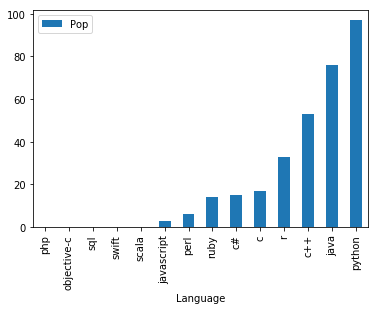

In [8]:
# Sorts lang_dict.items() according to the value of the corresponding item and generates it into the new list variable lang_sorted
lang_sorted = sorted(lang_dict.items(),key=lambda x:x[1])
# Generate a new DataFrame based on the calculated 'lang_sorted'
df_lang_sorted = pd.DataFrame(lang_sorted, columns = ['Language', 'Pop'])

df_lang_sorted.set_index(["Language"], inplace=True)
# Set Language as the index of df_lang_sorted so that it can be used as an abscissa label when drawing

!pip install matplotlib
import matplotlib
# Draw a df_lang_sorted bar chart
df_lang_sorted.plot.bar()

From the graphical results, we can see which of the top three languages are demand?

Answer: Python, Java, C++

### Explore data more carefully

First, check how many nulls are included in the data.

In [9]:
pd.isnull(df).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

#### Remove null item

In [10]:
df = df.dropna()
df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1235,1235,1235,1235,1235,1235,1235
unique,2,779,23,91,801,806,820
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1212,35,168,187,33,32,32


#### Observe the Company column

After executing the df.head result, we can see that the unique in the Company column is 2, except for Google, there is another company.

Let's see who is the other company!

In [11]:
df['Company'].value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

One can see that there is also a YouTube and a gold employer acquired by Google.

For the sake of analysis, no matter how much, I removed the YouTube-related line data.

In [12]:
# Remove data from Company listed as YouTube in df
df = df[df['Company'] == 'Google']
df.describe()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
count,1212,1212,1212,1212,1212,1212,1212
unique,1,761,23,91,784,788,802
top,Google,Business Intern 2018,Sales & Account Management,"Mountain View, CA, United States",Responsibilities and detailed projects will be...,Must be pursuing a full-time MBA program with ...,"Previous internship experience in Sales, Adver..."
freq,1212,35,167,187,33,32,32


#### Observe the approximate status of other columns

In [13]:
# Title column
df['Title'].value_counts()

Business Intern 2018                                                         35
MBA Intern, Summer 2018                                                      34
MBA Intern 2018                                                              28
BOLD Intern, Summer 2018                                                     21
Field Sales Representative, Google Cloud                                     17
Interaction Designer                                                         12
User Experience Researcher                                                    9
Recruiter                                                                     7
Partner Sales Engineer, Google Cloud                                          7
User Experience Design Intern, Summer 2018                                    7
User Experience Research Intern, Summer 2018                                  6
Partner Onboarding Manager (Americas)                                         6
Deal Manager, Google Cloud              

In [14]:
df['Location'].value_counts().head(20)
# Use value_counts to observe the statistics of the Location column. Note that only the first 20 items are listed.

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          68
London, United Kingdom               61
San Francisco, CA, United States     49
Singapore                            39
Sydney, Australia                    31
Tokyo, Japan                         31
Shanghai, China                      27
Seattle, WA, United States           27
Xinyi District, Taiwan               24
München, Germany                     23
Zürich, Switzerland                  22
Paris, France                        20
San Bruno, CA, United States         17
Austin, TX, United States            17
Boulder, CO, United States           15
Kirkland, WA, United States          14
São Paulo, Brazil                    13
Name: Location, dtype: int64

In [15]:
df['Category'].value_counts().head(20)
# Use value_counts to observe the statistics of the Location column. Note that only the first 20 items are listed.


Sales & Account Management          167
Marketing & Communications          161
Finance                             112
Technical Solutions                 100
Business Strategy                    92
People Operations                    86
User Experience & Design             83
Program Management                   72
Partnerships                         58
Product & Customer Support           48
Legal & Government Relations         43
Administrative                       39
Sales Operations                     31
Real Estate & Workplace Services     24
Software Engineering                 24
Hardware Engineering                 22
Manufacturing & Supply Chain         16
Technical Infrastructure             11
Network Engineering                   6
Technical Writing                     5
Name: Category, dtype: int64

### Working years

#### Rough calculation

In [16]:
from collections import defaultdict

# Use defaultdict to build a dictionary with a default value of 0
years_exp = defaultdict(lambda: 0)

# Define the statistical function, enter the string and extract the number described in the xxx of the period containing the xxx year

def compute_years_exp(miniumum_qualifications_string):
    for w in re.findall(r'([0-9]+) year', miniumum_qualifications_string):
        years_exp[w] += 1
        
# For each item in the Minimum Qualifications column, call the compute_years_exp method
for word in df['Minimum Qualifications']:
    compute_years_exp(str(word))
    
print(dict(years_exp))


{'3': 111, '7': 41, '2': 60, '1': 16, '4': 91, '10': 75, '5': 174, '12': 18, '8': 62, '6': 56, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1}


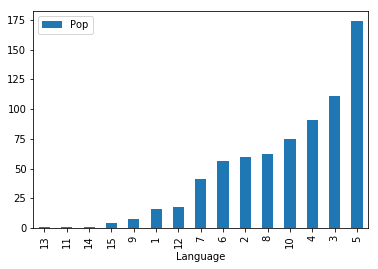

In [17]:
dict_years_exp = dict(years_exp)
# Sorts dict(years_exp) by value and generates it into the new list variable years_exp_sorted
years_exp_sorted = sorted(dict_years_exp.items(),key=lambda x:x[1])

# Generates a new DataFrame based on the calculated years_exp_sorted with columns named Years and Pop
df_years_exp_sorted = pd.DataFrame(years_exp_sorted, columns = ['Language', 'Pop'])

# Set Years to the index of df_years_exp_sorted so that it can be used as an abscissa label when drawing
df_years_exp_sorted.set_index(["Language"], inplace=True)

# Draw a df_years_exp_sorted bar chart
df_years_exp_sorted.plot.bar()


From the above graph, what are the top two demands for work experience? 

Answer: 5，3

#### Progressive processing

For each row, generate a new column, Minimum_years_experience, from the Minimum Qualifications column of the current row, extract the xxx in front of the xxx year

In [18]:
df.shape

(1212, 7)

In [19]:
# Generate df['Minimum_years_experience'], each line element is xxx in front of the xxx year in the Minimum Qualifications column of the corresponding row.
# Df['Minimum_years_experience'] type of each element is a list
# Define the statistical function, enter the string, and extract the number described in the xxx of the period containing the xxx year
list_experience = []
dict_experience = {'Minimum_years_experience':''}


df['Minimum_years_experience'] = None
i = 0
for word in df['Minimum Qualifications']:
    df['Minimum_years_experience'][i] = re.findall(r'([0-9])+ year', word)    
    i+=1
        

From the results, we can see that some lines will extract multiple numbers, but some lines will not be extracted, and further processing is needed.

#### Null value padding

Convert [] in df['Minimum_years_experience'] to [0]

In [20]:
def trans(number):
    if number == []:
        number = [0]
        return number
    if number == None:
        number = [0]
        return number
    else:
        return number
    
# Convert [] in df['Minimum_years_experience'] to [0], (Hint: apply can be used)

df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(trans)
print(df['Minimum_years_experience'])

# df.head()

0             [3]
1             [7]
2       [2, 1, 1]
3             [0]
4             [4]
5             [0]
6             [0]
7             [5]
8             [5]
9             [0]
10         [4, 4]
11            [5]
12            [0]
13            [5]
14            [0]
16            [0]
17            [3]
18         [5, 2]
19            [0]
20            [0]
21            [0]
22            [5]
23         [7, 5]
24            [0]
25            [0]
26            [5]
27            [0]
28         [0, 5]
29            [3]
30            [0]
          ...    
1219          [0]
1220          [0]
1221          [0]
1222          [0]
1223          [0]
1224          [0]
1225          [0]
1227          [0]
1228          [0]
1229          [0]
1230          [0]
1231          [0]
1232          [0]
1233          [0]
1234          [0]
1235          [0]
1236          [0]
1237          [0]
1238          [0]
1239          [0]
1240          [0]
1241          [0]
1242          [0]
1243          [0]
1244      

#### Deal with element with many values

When multiple elements appear in df['Minimum_years_experience'], such as [x, y, z], convert df['Minimum_years_experience'] to [max(x, y, z)]

In [21]:
def max_num(number):
    number = max(number)
    return number
       
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(max_num)
# print(df['Minimum_years_experience'].shape)

df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,2
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,...",0
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...,4


0       3
1       7
2       2
3       0
4       4
5       0
6       0
7       5
8       5
9       0
10      4
11      5
12      0
13      5
14      0
16      0
17      3
18      5
19      0
20      0
21      0
22      5
23      7
24      0
25      0
26      5
27      0
28      5
29      3
30      0
       ..
1219    0
1220    0
1221    0
1222    0
1223    0
1224    0
1225    0
1227    0
1228    0
1229    0
1230    0
1231    0
1232    0
1233    0
1234    0
1235    0
1236    0
1237    0
1238    0
1239    0
1240    0
1241    0
1242    0
1243    0
1244    0
1245    0
1246    0
1247    0
1248    0
1249    0
Name: Minimum_years_experience, Length: 1212, dtype: int32


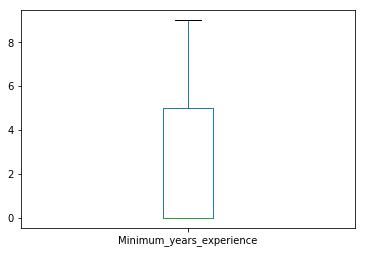

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df['Minimum_years_experience'] = df['Minimum_years_experience'].astype(int)
print(df['Minimum_years_experience'])
df['Minimum_years_experience'].plot.box()

# A box plot is drawn based on the df['Minimum_years_experience'] data.
# Note: If the element type is not a numeric type, drawing a box plot will fail and you need to use astype to convert the element type.


## From the box plot results, what is the median of the working years of demand?

Answer: 3

### View analyst post related data

We look for job requirements from the Title that contain the 'Analyst' keyword.

In [23]:
# Reset the index order of the Dataframe
df = df.reset_index(drop=True) 

In [24]:
# Find the position containing the 'Analyst' keyword from the Title and store it in df_Analyst.

list_2 = []
i = -1
for word in df['Title']:
    i += 1
    if 'Analyst' not in word:
        list_2.append(i)

df_Analyst = df.drop(list_2)      

# Reset the index order of the Dataframe
df_Analyst = df_Analyst.reset_index(drop=True) 
df_Analyst.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience
0,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,2
1,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...,4
2,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods and work wi...,PhD in Statistics or Econometrics or a related...,Relevant industry or research experience.\nFam...,0
3,Google,"Quantitative Analyst Lead, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Partner with cross-functional stakeholders to ...,"PhD degree in Statistics, Econometrics, relate...",Relevant and extensive PhD research or work ex...,5
4,Google,"Quantitative Analyst, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Work with data sets and solve non-routine anal...,Master's degree in a quantitative discipline o...,PhD in a quantitative discipline.\nExperience ...,2


In [25]:
# View the location distribution of analyst needs
df_Analyst['Location'].value_counts()

Mountain View, CA, United States    18
Sunnyvale, CA, United States        16
Zürich, Switzerland                  6
Dublin, Ireland                      5
London, United Kingdom               4
San Bruno, CA, United States         2
New York, NY, United States          2
Paris, France                        1
Hyderabad, India                     1
Seattle, WA, United States           1
Singapore                            1
Hamburg, Germany                     1
Beijing, China                       1
Tokyo, Japan                         1
Tel Aviv-Yafo, Israel                1
Kirkland, WA, United States          1
Name: Location, dtype: int64

#### Add country information

In the location information, the last comma is followed by the country name, and we further group the Location.
Generate a new column 'Country' in df_Analyst. From Location, extract the value after the last comma as the value of the column.

In [26]:
df_Analyst['Country'] = None
i = 0
for word in df_Analyst['Location']:
    if ',' in word:
        list_4 = re.findall(r', (\w* \w*)', word)
        if list_4 == []:
            list_4 = re.findall(r', (\w*)', word)
    else:
        list_4 = [word]
        
            
    df_Analyst['Country'][i] = list_4
    i += 1

df_Analyst['Country'].value_counts()

C:\Users\zijie\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


[United States]     40
[Switzerland]        6
[Ireland]            5
[United Kingdom]     4
[Germany]            1
[Japan]              1
[India]              1
[France]             1
[Israel]             1
[Singapore]          1
[China]              1
Name: Country, dtype: int64

What are the top 4 countries in demand?

Answer：United States, Switzerland, Ireland, United Kingdom

#### Statistical analysts' language skills needs

In [27]:
print(all_lang_count(df_Analyst))

{'python': 13, 'java': 1, 'c++': 1, 'php': 0, 'javascript': 0, 'objective-c': 0, 'ruby': 0, 'perl': 0, 'c': 0, 'c#': 0, 'sql': 0, 'swift': 0, 'scala': 0, 'r': 17}


Which language is the most demanding for data analysts?

Answer: r

#### Pivot table

Build a pivot table to explore the needs of data analysts in different countries.

The pivot table index is a secondary index, the first level is the country ('Country'), the second level is the job category ('Category'), and the values are 'Minimum_years_experience'. Define mean as aggfunc.

In [28]:
# Convert a list type element to a numeric type
i = 0
for word in df_Analyst['Country']:
    df_Analyst['Country'][i] = max(word)
    i += 1
df_Analyst.head()

C:\Users\zijie\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications,Minimum_years_experience,Country
0,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,2,United States
1,Google,"Data Analyst, Consumer Hardware",Product & Customer Support,"Mountain View, CA, United States",Build and maintain the Support Operations Anal...,"BA/BS degree in Computer Science, Engineering,...",Experience in designing and executing structur...,4,United States
2,Google,"Quantitative Analyst, Ads Quality",Product & Customer Support,"Zürich, Switzerland",Apply advanced statistical methods and work wi...,PhD in Statistics or Econometrics or a related...,Relevant industry or research experience.\nFam...,0,Switzerland
3,Google,"Quantitative Analyst Lead, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Partner with cross-functional stakeholders to ...,"PhD degree in Statistics, Econometrics, relate...",Relevant and extensive PhD research or work ex...,5,Switzerland
4,Google,"Quantitative Analyst, Trust and Safety",Product & Customer Support,"Zürich, Switzerland",Work with data sets and solve non-routine anal...,Master's degree in a quantitative discipline o...,PhD in a quantitative discipline.\nExperience ...,2,Switzerland


In [30]:
import numpy as np
category_country = df_Analyst.pivot_table(index=['Country','Category'],values='Minimum_years_experience',aggfunc=np.mean)
category_country

Minimum_years_experience
Country        Category                                              
China          Partnerships                                  4.000000
France         Sales Operations                              0.000000
Germany        Sales Operations                              0.000000
India          Product & Customer Support                    5.000000
Ireland        Finance                                       2.000000
               Legal & Government Relations                  0.000000
               Product & Customer Support                    0.000000
               Sales & Account Management                    4.000000
Israel         Business Strategy                             4.000000
Japan          Business Strategy                             3.000000
Singapore      Finance                                       6.000000
Switzerland    Product & Customer Support                    2.666667
United Kingdom Finance                                       0.000000
               Marketing & Communications                    6.000000
               Sales Operations                              8.000000
United States  Business Strategy                             2.333333
               Finance                                       3.750000
               Legal & Government Relations                  0.000000
               Marketing & Communications                    2.500000
               People Operations                             1.000000
               Product & Customer Support                    5.333333
               Program Management                            0.000000
               Sales Operations                              4.000000
               Technical Solutions                           2.000000

What is the corresponding Category in China's job requirements? What is the minimum working life required?

Answer: Partnerships，4 year